# Diffusive Equation

The diffusive equation is described by

$$
\partial_t \phi - \partial_{\alpha}\left( \nu \partial_{\alpha}\phi \right) = 0
$$(df-eq-lb)

where $\phi(\alpha,t)$ is a time and space dependent parameter and $\nu$ is diffusive coeficient. 


## Numerical Discretization

```{figure} mesh-1-diffusive.svg
---
scale: 250%
align: center
name: mesh-1-diffusive
---
1D regular grid example for diffusive equation.
```

### FDM Discretization

Discretizing the Eq. {eq}`df-eq-lb` through finite diference method, we have for forward time and central space (FTCS) discretizations:

$$
\partial_t \phi - \partial_{\alpha}\left( \nu \partial_{\alpha}\phi \right) = \frac{\phi(x,t + \Delta_{t}) - \phi(x,t) }{\Delta_{t}} - \nu\frac{ \phi(x - \Delta_{x},t) -2\phi(x,t) + \phi(x + \Delta_{x},t) }{\Delta_{x}^{2}} =0,
$$

for $\nu$ constant and isolating the term $u(x,t + \Delta_{t})$, we can describe the $\phi$ time evolution:

$$
\phi(x,t + \Delta_{t})   = \phi(x,t) + \frac{\nu\Delta_{t}}{\Delta_{x}^{2}} \left( \phi(x - \Delta_{x},t) -2\phi(x,t) + \phi(x + \Delta_{x},t) \right) .
$$

### Lattice Boltzmann Equation

Describing the problem through the BGK lattice Boltzmann equation (BGK-LB):

$$
f_i( x_{\alpha} + c_{i,\alpha} \delta t, t+\delta t) = f_i(x_{\alpha}, t)  -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right), 
$$(LB-df-Eq)

where the equilibrium distribution function is defined by

$$
f^{eq}_{i} = w_{i}\phi(x_{\alpha}, t),
$$

and the equilibrium moments are given by 

$$
\displaystyle\sum_{i=0} f_{i}^{eq}=\phi, \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} c_{i,\alpha} =0 \quad \quad \textrm{and} \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} c_{i,\alpha} c_{i,\beta} =c_{s}^{2} \phi \delta_{\alpha\beta}.
$$(moments-fi-df)

Through Chapman–Enskog analysis, it is demonstrated that the first-order non-equilibrium moment describes the pressure gradient and, consequently, the average velocity:

$$
m^{neq}_{\alpha} = \displaystyle\sum_{i} c_{i,\alpha}\left( f_i-f_i^{eq}\right)  = -(c_{s}^{2} \tau \delta_{t})\partial_{\alpha}\phi  \quad \quad \textrm{and} \quad\quad \tau = \displaystyle\frac{\nu}{c_{s}^{2} \delta_{t}} +\frac{1}{2}.
$$

#### Lattice Direction Moments

In [2]:
import warnings
warnings.filterwarnings("ignore")
from pylab import *
from __future__ import division
from sympy import *
import numpy as np
from sympy import S, collect, expand, factor, Wild
from sympy import fraction, Rational, Symbol
from sympy import symbols, sqrt, Rational
import sympy as sp
from IPython.display import display, Math, Latex
#-------------------------------------------------Símbolos----------------------------------------------
omega, p, w = symbols('omega, \\phi, w')
wi, cx, cy, cs = symbols('w_{i} c_{x} c_{y} c_{s}')
fi, f0, f1, f2, f3, f4, f5, f6, f7, f8,  = symbols('f_{i} f_{0} f_{1} f_{2} f_{3} f_{4} f_{5} f_{6} f_{7} f_{8}')
#-------------------------------------------------Funções----------------------------------------------
feq = Function('feq')(wi, cx, cy)
fneq = Function('fneq')(wi, cx, cy)
f = Function('f')(fi)
#----------------------------------------------Lattice-D2Q9---Variáveis----------------------------------------------
fi=np.array([f1,f2,f3,f4,f5,f6,f7,f8])
w0=Rational(4,9);w1=Rational(1,9);w2=Rational(1,36)
wi=np.array([w0,w1,w1,w1,w1,w2,w2,w2,w2])
cx=np.array([0,1,0,-1,0,1,-1,-1,1])
cy=np.array([0,0,1,0,-1,1,1,-1,-1])
as2=Rational(3)
cs2=1/as2
#-------------------------------------------------Calc.Func------------------------------------------------
f= fi
feq=wi*p

In [3]:
a0=simplify(sum(feq))
ax=simplify(sum(feq*cx))
ay=simplify(sum(feq*cy))
axx=simplify(sum(feq*cx*cx))
axy=simplify(sum(feq*cx*cy))
ayy=simplify(sum(feq*cy*cy))
display(Math(r"\underbrace{\sum_{i=0} f_{i}^{eq} =\sum_{i=0} f_{i} }_{\textrm{Zero-Order Moment}} =" +  sp.latex(a0) 
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,x} }_{\textrm{x-First-Order Moment}} =" +  sp.latex(ax)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,y} }_{\textrm{y-First-Order Moment}} =" +  sp.latex(ay)
            +r",\\ \quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,x}c_{i,x} }_{\textrm{xx-Second-Order Moment}} =" +  sp.latex(axx)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,x}c_{i,y} }_{\textrm{xy-Second-Order Moment}} =" +  sp.latex(axy)
            +r" \quad \quad and \quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,y}c_{i,y} }_{\textrm{yy-Second-Order Moment}} =" +  sp.latex(ayy)))

<IPython.core.display.Math object>

#### Chapmann-Enskog Analysis

```{toggle}
Applying the Chapmann-Enskog procedure to LB equation, we expand the term $f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)$ in a Taylor series to recover the derivative form of the equation, i.e.,

$$
f_{i}\left( x_{\alpha} + c_{i,\alpha} \Delta t, t+\Delta t\right)- f_{i}( x_{\alpha}, t)=\displaystyle\sum_{j=1}^{\infty}\frac{\Delta t^{j}}{j!}D_{t}^{j}f_{i}= -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right).
$$(EqExp-df-Eq)

Rescaling the dimensionless form of the Eq. {eq}`EqExp-df-Eq` in terms of the Knudsen number ($Kn$), we have

$$
\displaystyle \sum^{\infty}_{j=1}  \frac{Kn^{(j-1)}}{j!} D_{t}^{j} f_{i} = - \frac{1}{Kn}\left( \frac{ f_{i} - f_{eq,i} }{ \tau } \right) \quad \quad \rightarrow \quad \quad \displaystyle \sum^{\infty}_{j=1}  \frac{Kn^{(j)}}{j!} D_{t}^{j} f_{i} = -  \frac{ f_{i} - f_{i}^{eq} }{ \tau },
$$

applying the asymptotic expansion in both the distribution function ($f_{i}=f_{i}^{(0)}+Kn f_{i}^{(1)} + Kn^{2} f_{i}^{(2)}+\cdots$) and time partial derivative ($\partial_{t}=\partial_{t}^{(0)}+ Kn \partial_{t}^{(1)}+Kn^{2} \partial_{t}^{(2)}+\cdots$), and separating the equation in orders up to the order $Kn^{2}$:

$$
\begin{array}{ll}
    (Kn^{(0)}):& f_{i}^{(0)}= f_{i}^{eq},\\
    (Kn^{(1)}):& \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= - \displaystyle\frac{ f_{i}^{(1)} }{ \tau } , \\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(1)} + \displaystyle\frac{\left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)^{2} f_{i}^{(0)}}{2}= - \displaystyle\frac{ f_{i}^{(2)} }{ \tau },\\
    \textrm{ou}\\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)\displaystyle\left(1 - \frac{1}{2\tau}\right) f_{i}^{(1)} =  - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \quad\quad \rightarrow \quad\quad  f_{i}^{(1)}\textrm{ Formulation} \\
    \textrm{ou}\\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)^{2} \displaystyle\left(\frac{1}{2} - \tau\right) f_{i}^{(0)} =  - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \quad\quad \rightarrow  \quad\quad f_{i}^{(0)}\textrm{ Formulation}.
 \end{array}
$$(Chap-Kn-df-Eq)

##### Zero-Order Moment Balance

To retrieve the balance equation, we sum the Eq. {eq}`Chap-Kn-df-Eq` for $Kn^{(1)}$ and $Kn^{(2)}$ over $\sum_{i=0} $:

$$
\begin{array}{l}
(Kn^{(1)}): \displaystyle\sum_{i}\left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= \displaystyle\sum_{i} \left(- \displaystyle\frac{ f_{i}^{(1)} }{ \tau } \right),\\
(Kn^{(1)}): \partial_{t}^{(0)}  \phi =0,
\end{array}
$$

and

$$
\begin{array}{l}
(Kn^{(2)}): \displaystyle\sum_{i}\left( \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)^{2} \displaystyle\left( \frac{1}{2}-\tau\right) f_{i}^{(0)} \right) =  \displaystyle\sum_{i}\left( - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \right), \\
(Kn^{(2)}): \partial_{t}^{(1)}\phi + \left( \displaystyle\frac{1}{2}-\tau\right) \partial_{\alpha}\partial_{\beta} \left(c_{s}^{2} \phi \delta_{\alpha\beta} \right) =0. 
\end{array}
$$

or

$$
\begin{array}{l}
(Kn^{(2)}):& \displaystyle\sum_{i}\left[ \partial_{t}^{(1)} f_{i}^{(0)} + \left(1-\displaystyle\frac{1}{2\tau}\right)\left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right) f_{i}^{(1)}   \right]=  \displaystyle\sum_{i}\left( - \displaystyle\frac{f_{i}^{(2)}}{\tau} \right), \nonumber \\
(Kn^{(2)}):& \partial_{t}^{(1)}\phi + \left(1-\displaystyle\frac{1}{2\tau}\right) m^{(1)}_{\alpha} = 0.
\end{array}
$$(df-Kn1-0-B0)

where $m^{(1)}_{\alpha}$ is the first-order moment of $f_{i}^{(1)}$ and $\sum_{i=1}f_{i}^{(j)}=0$ for $j\geq 1$ due to imposition of $\phi$ conservation. To compute the moment $m^{(1)}_{\alpha}$, we multiply Eq. {eq}`Chap-Kn-df-Eq` by $c_{i,\alpha}$ and sum over all lattice directions:

$$
\begin{array}{l}
(Kn^{(1)}): \displaystyle\sum_{i}c_{i,\alpha}\left( \partial_{t}^{(0)} + e_{\beta,i}\partial_{\beta} \right)f_{i}^{(0)}= \displaystyle\sum_{i} c_{i,\alpha} \left( -\frac{f_{i}^{(1)}}{\tau}  \right),\\
(Kn^{(1)}): m^{(1)}_{\alpha} =-\tau \partial_{\beta}\left( c_{s}^{2} \phi \delta_{\alpha\beta}  \right).
\end{array}
$$(df-Kn0-B1)


By substituting Eq. {eq}`df-Kn0-B1` into Eq. {eq}`df-Kn1-0-B0`, we recover the Eq. {eq}`df-eq-lb`, where $\nu=c_{s}^{2}(\tau-1/2)$. In the regularized formulation of the lattice Boltzmann equation, the first-order correction is approximated as $f_{i}^{(1)}\approx (f_{i}-f_{i}^{(0)})=f_{i}^{neq}$, where higher-order Knudsen moments are filtered out and the collision term is reformulated in terms of $f_{i}^{neq}$.
```

#### Boundary Conditions

The boundary conditions for the lattices can be derived by solving a linear system of known moments.

| D1Q2: | Boundaries      |   | Layers                                                                          |   |                                                                                 |
|------|-----------------|---|---------------------------------------------------------------------------------|---|---------------------------------------------------------------------------------|
|      |                 |   | West                                                                            |   | East                                                                            |
|      | Unknown $f_{i}$ |   | $f_2=\phi_{e} - f_1$                                                            |   | $f_1=\phi_{w} - f_2$                                                            |
|      |                 |   |                                                                                 |   |                                                                                 |
| D1Q3: | Boundaries      |   | Layers                                                                          |   |                                                                                 |
|      |                 |   | West                                                                            |   | East                                                                            |
|      | Unknown $f_{i}$ |   | $f_2=\phi_{e} - f_1 - f_0$                                                            |   | $f_1=\phi_{w} - f_2 - f_0$                                                            |
|      |                 |   |                                                                                 |   |                                                                                 |
<!-- | D2Q5: | Boundaries      |   | Layers                                                                          |   |                                                                                 |
|      |                 |   | North                                                                           |   | South                                                                           |
|      | Unknown $f_{i}$ |   | $f_2=\phi_{n} - (f_0+f_1+f_3+f_4)$                                              |   | $f_4=\phi_{s} - (f_0+f_1+f_2+f_3)$                                              |
|      |                 |   | East                                                                            |   | East                                                                            |
|      |                 |   | $f_3=\phi_{e} - (f_0+f_1+f_2+f_4)$                                              |   | $f_1=\phi_{w} - (f_0+f_2+f_3+f_4)$                                              | -->

## 1st Benchmark: Single sine mode on a finite rod (Dirichlet)

PDE: $(\phi_t = \partial_{x}(\nu\partial_{x}\phi), (0<x<L,\ t>0)$

BC: $(\phi(0,t)=\phi(L,t)=0)$

IC: $\phi(x,0)=\sin \left(\frac{\pi x}{L}\right)$

**Solution**

$$
\phi(x,t)=\sin\left(\frac{\pi x}{L}\right) \exp \left(-\nu \frac{\pi^2}{L^2} t\right).
$$

### LBM D1Q3 Solution ($\tau=1$)

In [48]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0             # Length of the domain
nu = 0.1/3.0        # Diffusion coefficient
t_end = 2.0             # Total simulation time
#--------------------------------------- Lattice-Properties-D1Q3 ----------------------------------------------
cs=1.0/np.sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int8")  
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=21               # Domain Length
dx = L / (Nx-1)     # Spatial step size
c=1.0*2**(2)        # c=dx/dt
dt=dx/c             # Time step value
nt = int(t_end / dt)    # Time step number
nue=nu/(c*dx)       # Diffusion coefficient
tau=nue/cs**2+0.5   # Relaxation Time
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"nue={nue:.4f}\t tau={tau:.4f}")
#--------------------------------- Initialization - Numerical Arrays -----------------------------------------
T = np.zeros((Nx),dtype="float64")
x = np.linspace(0, Nx-1, Nx)
T = np.sin(np.pi * x / (Nx-1))
f = np.zeros((3,Nx),dtype="float64")
fp = np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    fp[k,:]=w[k]*T[:]
#--------------------------------- Initialization - Save Data Arrays -----------------------------------------
snaps=5 # number of states saved over time including 0 and t_end
T_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
snaps_id = np.linspace(0, nt, snaps, dtype="int16") # timesteps to take the field
snap_index = {sid: i for i, sid in enumerate(snaps_id)}
for i in range(snaps):
    T_snaps[i] = np.zeros((Nx), dtype="float64")
T_snaps[0][:]=T[:]
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 0.0 - f[0,0]-f[2,0]
    f[2,Nx-1]= 0.0 - f[0,Nx-1]-f[1,Nx-1]
    #----------------------Macro------------------
    T[:]=f[0,:]+f[1,:]+f[2,:]
    #---------------------save-snaps--------------
    if t+1 in snaps_id:
        i = snap_index[t+1]
        T_snaps[i][:]=T[:]
    #--------------------Collision----------------
    for k in range(0,3):
        fp[k,:]=f[k,:] - (f[k,:] - w[k]*T[:])/tau

dx=5.0000e-02	 dt=1.2500e-02	 nt=160
nue=0.1667	 tau=1.0000


### FDM Solution

In [52]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0            # Length of the domain
nu = 0.1/3.0           # Diffusion coefficient
t_end = 2.0             # Total simulation time
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=21 #Square Domain Length
dx = L / (Nx-1)       # Spatial step size
c=1.0*2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(t_end / dt)    # Time step number
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"nue={nue:.4f}\t tau={tau:.4f}")
#--------------------------------- Initialization - Numerical Arrays -----------------------------------------
Tf = np.zeros((Nx),dtype="float64")
x = np.linspace(0, Nx-1, Nx)
Tf = np.sin(np.pi * x / (Nx-1))
Tfp = np.zeros((Nx),dtype="float64")
#--------------------------------- Initialization - Save Data Arrays -----------------------------------------
snaps=5 # number of states saved over time including 0 and t_end
Tf_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
snaps_id = np.linspace(0, nt, snaps, dtype="int16") # timesteps to take the field
snap_index = {sid: i for i, sid in enumerate(snaps_id)}
for i in range(snaps):
    Tf_snaps[i] = np.zeros((Nx), dtype="float64")
Tf_snaps[0][:]=Tf[:]
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #--------------------Time iteration-----------
    Tfp[:]=Tf[:] + dt * nu * ( np.roll(Tf[:], 1, axis=0) -2.0*Tf[:] + np.roll(Tf[:], -1, axis=0) ) / dx**2
    Tf[:]=Tfp[:]
    Tf[0]= 0.0 
    Tf[Nx-1]= 0.0
    #---------------------save-snaps--------------
    if (t+1) in snaps_id:
        i = snap_index[t+1]
        Tf_snaps[i][:]=Tf[:]

dx=5.0000e-02	 dt=1.2500e-02	 nt=160
nue=0.1667	 tau=1.0000


### Numerical and Analytical Comparisson

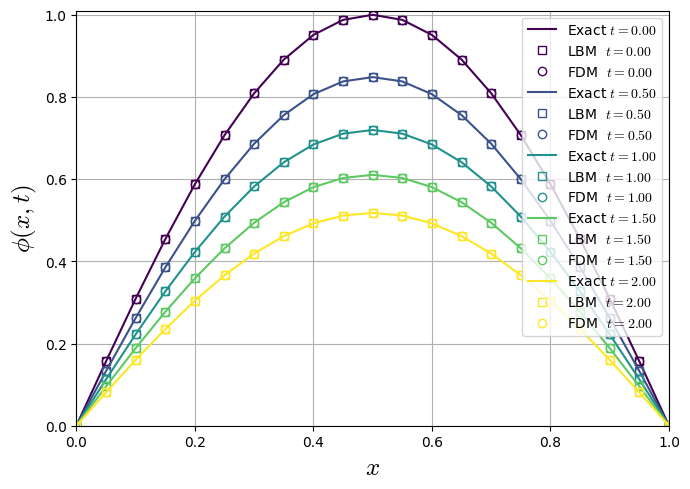

In [53]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0             # Domain length
nu = 0.1/3.0        # Diffusion coefficient
t_end = 2.0             # Total simulation time
snaps=5 # number of states saved over time including 0 and t_end
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx = 21       # Number of spatial points
#--------------------------------------- Plot Results -------------------------------------------------------
def T_exact(x, t, L, nu): # ---------------- exact solution ----------------
    return np.sin(np.pi * x / L) * np.exp(-nu * (np.pi / L)**2 * t)
xl = np.linspace(0, L, Nx)
times = np.linspace(0, t_end, snaps, dtype="float64") # timesteps to take the field
plt.figure(figsize=(7, 5))
colors = plt.cm.viridis(np.linspace(0, 1, snaps))
for i in range(snaps):
    plt.plot(xl, T_exact(xl, times[i], L, nu), color=colors[i], label=f"Exact $t = {times[i]:.2f}$")
    plt.plot(xl, T_snaps[i], "s", color=colors[i], lw=1, label=f"LBM  $t={(snaps_id[i]/nt)*t_end :.2f}$",fillstyle='none')
    plt.plot(xl, Tf_snaps[i], "o", color=colors[i], lw=1, label=f"FDM  $t={(snaps_id[i]/nt)*t_end:.2f}$",fillstyle='none')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$\phi(x,t)$",fontsize=18)
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2nd Benchmark: Temperature ramp

Analyzing the accuracy of diffusive equation solver, we apply it to a one-dimensional analytical case. The geometry is described by a domain of length $L$ initialized with a constant temperatura $T(x,t=0)=0$. The boundary conditions are given $T(x=0,t)=1$ and $T(x=L,t)=0$.

### Steady-State Analytical Solution

The analytical solution of this problem is given by:

$$
T(x,t\rightarrow \infty)= -\frac{x}{L} + 1.
$$

### Transient Analytical Solution

For the 1D heat equation $\partial_t T=\nu\,\partial_{xx}T$ on $0<x<L$ with

$$
T(0,t)=1,\qquad T(L,t)=0,
$$

the steady state is $T_{\text{ss}}(x)=1-\tfrac{x}{L}$. With $u=T-T_{\text{ss}}$ (so $u(0,t)=u(L,t)=0$), the solution is

$$
T(x,t)=1-\frac{x}{L}+\sum_{n=1}^{\infty} B_n\,e^{-\nu (n\pi/L)^2 t}\,\sin\!\Big(\frac{n\pi x}{L}\Big),
\quad
B_n=\frac{2}{L}\int_0^L\!\Big[T_0(\xi)-\Big(1-\frac{\xi}{L}\Big)\Big]\sin\!\Big(\frac{n\pi \xi}{L}\Big)\,d\xi.
$$

Special case $T_0(x)=0$: $B_n=-\dfrac{2}{n\pi}$, so

$$
T(x,t)=1-\frac{x}{L}-\frac{2}{\pi}\sum_{n=1}^{\infty}\frac{1}{n}\,e^{-\nu (n\pi/L)^2 t}\,\sin\!\Big(\frac{n\pi x}{L}\Big).
$$

Here’s a ready-to-run Python snippet (with a single plot of $T(x,t)$ vs $x$ for multiple times):

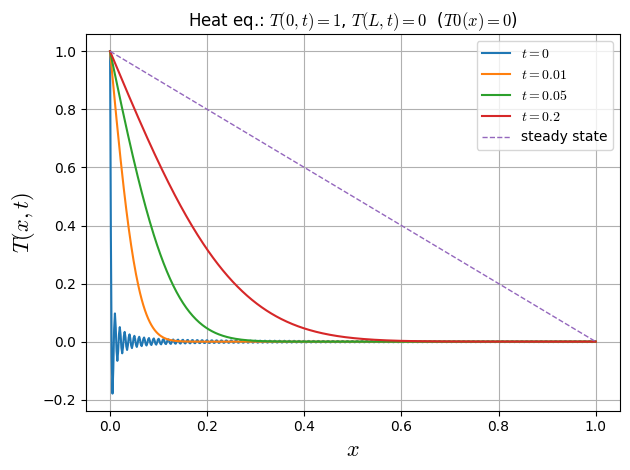

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'

# ---- Modes and series -------------------------------------------------------
def modes_dirichlet_dirichlet(L, N):
    n = np.arange(1, N+1)        # n = 1,2,...,N
    k = n * np.pi / L            # eigenvalues mu_n
    return n, k

def project_coeffs_dirichlet(T0_func, L, N, grid_pts=4000):
    """
    B_n = (2/L) ∫( T0(x) - T_ss(x) ) sin(nπx/L) dx, with T_ss = 1 - x/L.
    """
    x = np.linspace(0.0, L, grid_pts, endpoint=True)
    Tss = 1.0 - x / L
    u0 = T0_func(x) - Tss
    n, k = modes_dirichlet_dirichlet(L, N)          # (N,), (N,)
    S = np.sin(k[:, None] * x[None, :])             # (N, M)
    B = (2.0 / L) * np.trapz(u0[None, :] * S, x, axis=1)
    return B, n, k

def T_series_dirichlet(x, t, L, nu, B, k):
    """
    T(x,t) = T_ss(x) + sum_n B_n e^{-nu k_n^2 t} sin(k_n x), T_ss = 1 - x/L.
    """
    x = np.asarray(x)
    Tss = 1.0 - x / L
    coeff = B * np.exp(-nu * (k**2) * t)            # (N,)
    add = np.sum(coeff[:, None] * np.sin(k[:, None] * x[None, :]), axis=0)
    return Tss + add

# ---- Parameters -------------------------------------------------------------
L   = 1.0
nu  = 0.1
N   = 200
x   = np.linspace(0, L, 600)

# ---- Case A: initially cold rod T0(x)=0 (closed-form coefficients) ----------
n, k = modes_dirichlet_dirichlet(L, N)
B_cold = -2.0 / (n * np.pi)   # exact coefficients for T0 ≡ 0

times = [0.0, 0.01, 0.05, 0.2]

plt.figure()
for t in times:
    T_xt = T_series_dirichlet(x, t, L, nu, B_cold, k)
    plt.plot(x, T_xt, label=f"$t = {t:g}$")

# steady state
plt.plot(x, 1.0 - x/L, linestyle="--", linewidth=1, label="steady state")

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$T(x,t)$",fontsize=16)
plt.title("Heat eq.: $T(0,t)=1$, $T(L,t)=0$  ($T0(x)=0$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3rd Benchmark: Temperature Ramp with Adiabatic Boundary

Assuming the **forward heat equation** in 1D with constant diffusivity $\nu>0$,

$$
\partial_t T=\nu\,\partial_{xx}T,\qquad 0<x<L,\ t>0,
$$

and the mixed boundary conditions

$$
T(0,t)=1,\qquad \partial_x T(L,t)=0,
$$

the steady state is $T_{\mathrm{ss}}(x)=1$.

Let $u(x,t)=T(x,t)-1$. Then $u$ solves

$$
\partial_t u=\nu\,\partial_{xx}u,\quad u(0,t)=0,\quad \partial_x u(L,t)=0,\quad u(x,0)=u_0(x):=T_0(x)-1.
$$

Separation of variables with eigenfunctions satisfying $X(0)=0,\ X'(L)=0$ gives

$$
X_n(x)=\sin(\mu_n x),\qquad \mu_n=\frac{(n+\tfrac12)\pi}{L},\quad n=0,1,2,\dots
$$

Hence the solution is the sine‐series

$$
\boxed{\
T(x,t)=1+\sum_{n=0}^{\infty} A_n\,e^{-\nu\,\mu_n^{2}\,t}\,\sin(\mu_n x),\qquad 
\mu_n=\frac{(n+\tfrac12)\pi}{L},\
}
$$

with coefficients (using $\int_0^L \sin(\mu_m x)\sin(\mu_n x)\,dx=\tfrac{L}{2}\delta_{mn}$)

$$
\boxed{\ A_n=\frac{2}{L}\int_0^L \big[T_0(\xi)-1\big]\sin(\mu_n \xi)\,d\xi.\ }
$$

**Common special case (initially cold rod):** if $T_0(x)=0$, then $u_0(x)=-1$ and

$$
A_n=\frac{2}{L}\int_0^L (-1)\sin(\mu_n \xi)\,d\xi=-\frac{2}{L\mu_n},
$$

so

$$
\boxed{\
T(x,t)=1-\sum_{n=0}^\infty \frac{2}{L\mu_n}\,e^{-\nu\,\mu_n^{2}\,t}\,\sin(\mu_n x),\qquad 
\mu_n=\frac{(n+\tfrac12)\pi}{L}.\
}
$$

> Note: if you literally use your original sign $\partial_t T+\nu T_{xx}=0$ (the **backward** heat equation), the time-dependent problem is ill-posed forward in $t$. For a physically meaningful diffusion process, use $\partial_t T=\nu T_{xx}$.

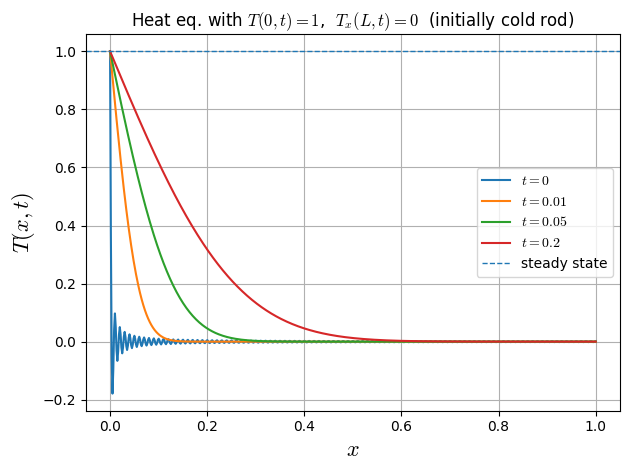

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import warnings
warnings.filterwarnings("ignore")

def heat_modes(L, N):
    n = np.arange(N)
    mu = (n + 0.5) * np.pi / L
    return mu

def project_coeffs(T0_func, L, N, grid_pts=2000):
    x = np.linspace(0.0, L, grid_pts, endpoint=True)
    u0 = T0_func(x) - 1.0
    mu = heat_modes(L, N)                           # (N,)
    S = np.sin(mu[:, None] * x[None, :])            # (N, M)
    A = (2.0 / L) * np.trapz(u0[None, :] * S, x, axis=1)  # (N,)
    return A, mu

def T_series(x, t, L, nu, A, mu):
    x = np.asarray(x)
    coeff = A * np.exp(-nu * (mu**2) * t)           # (N,)
    return 1.0 + np.sum(coeff[:, None] * np.sin(mu[:, None] * x[None, :]), axis=0)

# ---- Parameters -------------------------------------------------------------
L = 1.0
nu = 0.1
N = 200               # number of modes
x = np.linspace(0, L, 600)

# ---- Case 1: initially cold rod T0(x)=0 (closed-form A_n) -------------------
mu = heat_modes(L, N)
A_cold = -2.0 / (L * mu)

times = [0.0, 0.01, 0.05, 0.2]

plt.figure()
for t in times:
    T_xt = T_series(x, t, L, nu, A_cold, mu)
    plt.plot(x, T_xt, label=f"$t = {t:g}$")

# Steady-state baseline (T=1)
plt.axhline(1.0, linestyle="--", linewidth=1, label="steady state")

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$T(x,t)$",fontsize=16)
plt.title("Heat eq. with $T(0,t)=1$,  $T_x(L,t)=0$  (initially cold rod)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()